In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.client import device_lib
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [3]:
Train_data = pd.read_csv('train.csv')
Test_data = pd.read_csv('test.csv')
Train_data.dropna(inplace=True)
Test_data.dropna(inplace=True)

In [4]:
Train_data.drop(["Unnamed: 0","id"], axis=1, inplace=True)
Test_data.drop(["Unnamed: 0","id"], axis=1, inplace=True)
X_train = Train_data.iloc[:10000, :-1]
Y_train = Train_data.iloc[:10000, -1]
X_test = Test_data.iloc[:3000, :-1]
Y_test = Test_data.iloc[:3000, -1]

In [5]:
X_train

Gender      Customer Type  Age   Type of Travel     Class  \
0        Male     Loyal Customer   13  Personal Travel  Eco Plus   
1        Male  disloyal Customer   25  Business travel  Business   
2      Female     Loyal Customer   26  Business travel  Business   
3      Female     Loyal Customer   25  Business travel  Business   
4        Male     Loyal Customer   61  Business travel  Business   
...       ...                ...  ...              ...       ...   
10021  Female     Loyal Customer   23  Personal Travel       Eco   
10022    Male  disloyal Customer   59  Business travel       Eco   
10023  Female     Loyal Customer   32  Business travel  Business   
10024  Female     Loyal Customer   14  Personal Travel       Eco   
10025    Male     Loyal Customer   25  Personal Travel  Eco Plus   

       Flight Distance  Inflight wifi service  \
0                  460                      3   
1                  235                      3   
2                 1142                      2   
3                  562                      2   
4                  214                      3   
...                ...                    ...   
10021             1624                      3   
10022              302                      1   
10023             2841                      5   
10024              599                      1   
10025              511                      4   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                      4                       3   
1                                      2                       3   
2                                      2                       2   
3                                      5                       5   
4                                      3                       3   
...                                  ...                     ...   
10021                                  3                       3   
10022                                  1                       1   
10023                                  5                       5   
10024                                  4                       1   
10025                                  4                       3   

       Gate location  ...  Seat comfort  Inflight entertainment  \
0                  1  ...             5                       5   
1                  3  ...             1                       1   
2                  2  ...             5                       5   
3                  5  ...             2                       2   
4                  3  ...             5                       3   
...              ...  ...           ...                     ...   
10021              1  ...             2                       2   
10022              4  ...             1                       1   
10023              5  ...             4                       4   
10024              3  ...             3                       3   
10025              4  ...             4                       4   

       On-board service  Leg room service  Baggage handling  Checkin service  \
0                     4                 3                 4                4   
1                     1                 5                 3                1   
2                     4                 3                 4                4   
3                     2                 5                 3                1   
4                     3                 4                 4                3   
...                 ...               ...               ...              ...   
10021                 4                 4                 5                3   
10022                 2                 3                 3                3   
10023                 5                 2                 5                4   
10024                 4                 5                 3                2   
10025                 4                 2                 5                5   

       Inflight se

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
labelencoder_Y = LabelEncoder()
X_train['Gender'] = labelencoder_X.fit_transform(X_train['Gender'])  
X_test['Gender'] = labelencoder_X.transform(X_test['Gender'])  

X_train['Customer Type'] = labelencoder_X.fit_transform(X_train['Customer Type'])
X_test['Customer Type'] = labelencoder_X.transform(X_test['Customer Type'])  

X_train['Type of Travel'] = labelencoder_X.fit_transform(X_train['Type of Travel'])
X_test['Type of Travel'] = labelencoder_X.transform(X_test['Type of Travel'])

X_train['Class'] = labelencoder_X.fit_transform(X_train['Class'])
X_test['Class'] = labelencoder_X.transform(X_test['Class'])

Y_train = labelencoder_Y.fit_transform(Y_train) 
Y_test = labelencoder_Y.transform(Y_test) 

In [7]:
X_train.drop(["Departure Delay in Minutes"], axis=1, inplace=True)
X_test.drop(["Departure Delay in Minutes"], axis=1, inplace=True)
X_train_arr=X_train.values
X_test_arr=X_test.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [8]:
scaled_X_train

array([[ 1.02204289, -0.46852129, -1.73803563, ...,  1.16138991,
         1.3115761 ,  0.06739875],
       [ 1.02204289,  2.13437475, -0.94457811, ...,  0.31477239,
        -1.71554548, -0.23687311],
       [-0.97843252, -0.46852129, -0.87845665, ...,  0.31477239,
         1.3115761 , -0.38900904],
       ...,
       [-0.97843252, -0.46852129, -0.48172789, ...,  1.16138991,
         0.55479571, -0.36365305],
       [-0.97843252, -0.46852129, -1.67191417, ...,  0.31477239,
        -0.20198469,  1.84231794],
       [ 1.02204289, -0.46852129, -0.94457811, ...,  1.16138991,
         0.55479571, -0.38900904]])

## Keras

In [48]:
model =  keras.Sequential()
model.add(layers.Dense(500, activation='sigmoid', input_shape=(X_train_arr.shape[1],)))
model.add(layers.Dense(800, activation='relu'))
model.add(layers.Dense(800, activation='tanh'))
model.add(layers.Dense(800, activation='relu'))
model.add(layers.Dense(800, activation='relu'))
model.add(layers.Dense(800, activation='relu'))
model.add(layers.Dense(500, activation='sigmoid'))
model.add(layers.BatchNormalization()) 
model.add(layers.Dense(2, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
from keras.optimizers import Adam
from keras.optimizers import SGD
opt = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy',   optimizer=opt, metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 500)               11000     
                                                                 
 dense_44 (Dense)            (None, 800)               400800    
                                                                 
 dense_45 (Dense)            (None, 800)               640800    
                                                                 
 dense_46 (Dense)            (None, 800)               640800    
                                                                 
 dense_47 (Dense)            (None, 800)               640800    
                                                                 
 dense_48 (Dense)            (None, 800)               640800    
                                                                 
 dense_49 (Dense)            (None, 500)              

In [49]:
Y_train=Y_train.reshape(-1,1)

In [50]:
history = model.fit(scaled_X_train,Y_train,epochs=200,batch_size=100,verbose = 2,shuffle=True)

Epoch 1/200
100/100 - 3s - loss: 0.4085 - accuracy: 0.8639 - 3s/epoch - 35ms/step
Epoch 2/200
100/100 - 2s - loss: 0.3562 - accuracy: 0.8744 - 2s/epoch - 24ms/step
Epoch 3/200
100/100 - 2s - loss: 0.3403 - accuracy: 0.8764 - 2s/epoch - 21ms/step
Epoch 4/200
100/100 - 3s - loss: 0.3317 - accuracy: 0.8775 - 3s/epoch - 30ms/step
Epoch 5/200
100/100 - 3s - loss: 0.3146 - accuracy: 0.8817 - 3s/epoch - 29ms/step
Epoch 6/200
100/100 - 3s - loss: 0.3068 - accuracy: 0.8830 - 3s/epoch - 29ms/step
Epoch 7/200
100/100 - 3s - loss: 0.2946 - accuracy: 0.8884 - 3s/epoch - 29ms/step
Epoch 8/200
100/100 - 3s - loss: 0.2819 - accuracy: 0.8953 - 3s/epoch - 27ms/step
Epoch 9/200
100/100 - 3s - loss: 0.2694 - accuracy: 0.8979 - 3s/epoch - 28ms/step
Epoch 10/200
100/100 - 3s - loss: 0.2610 - accuracy: 0.9011 - 3s/epoch - 26ms/step
Epoch 11/200
100/100 - 3s - loss: 0.2536 - accuracy: 0.9055 - 3s/epoch - 28ms/step
Epoch 12/200
100/100 - 3s - loss: 0.2413 - accuracy: 0.9074 - 3s/epoch - 28ms/step
Epoch 13/200


In [52]:
Y_pred=model.predict(scaled_X_test)
Y_pred=Y_pred.reshape(-1)
Y_pred[np.where(Y_pred>0.5)]=1
Y_pred[np.where(Y_pred<0.5)]=0
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

94/94 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1681
           1       0.99      0.87      0.92      1319

    accuracy                           0.94      3000
   macro avg       0.95      0.93      0.93      3000
weighted avg       0.94      0.94      0.94      3000

0.9366666666666666


In [53]:
Y_test

array([1, 1, 0, ..., 0, 0, 0])

In [54]:
Y_pred

array([1., 1., 0., ..., 0., 0., 0.], dtype=float32)

## Image recognition

In [2]:
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer 
import random
from matplotlib.image import imread
from PIL import Image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing import image
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
image_csv=pd.read_csv("Nutts/tree nuts.csv")

In [3]:
image_csv.head(10)

class index              filepaths   labels data set
0            0  train/almonds/001.jpg  almonds    train
1            0  train/almonds/002.jpg  almonds    train
2            0  train/almonds/003.jpg  almonds    train
3            0  train/almonds/004.jpg  almonds    train
4            0  train/almonds/005.jpg  almonds    train
5            0  train/almonds/006.jpg  almonds    train
6            0  train/almonds/007.jpg  almonds    train
7            0  train/almonds/008.jpg  almonds    train
8            0  train/almonds/009.jpg  almonds    train
9            0  train/almonds/010.jpg  almonds    train

In [4]:
print(f"Total number of Nutts classes : {len(image_csv.labels.unique())}")

Total number of Nutts classes : 10


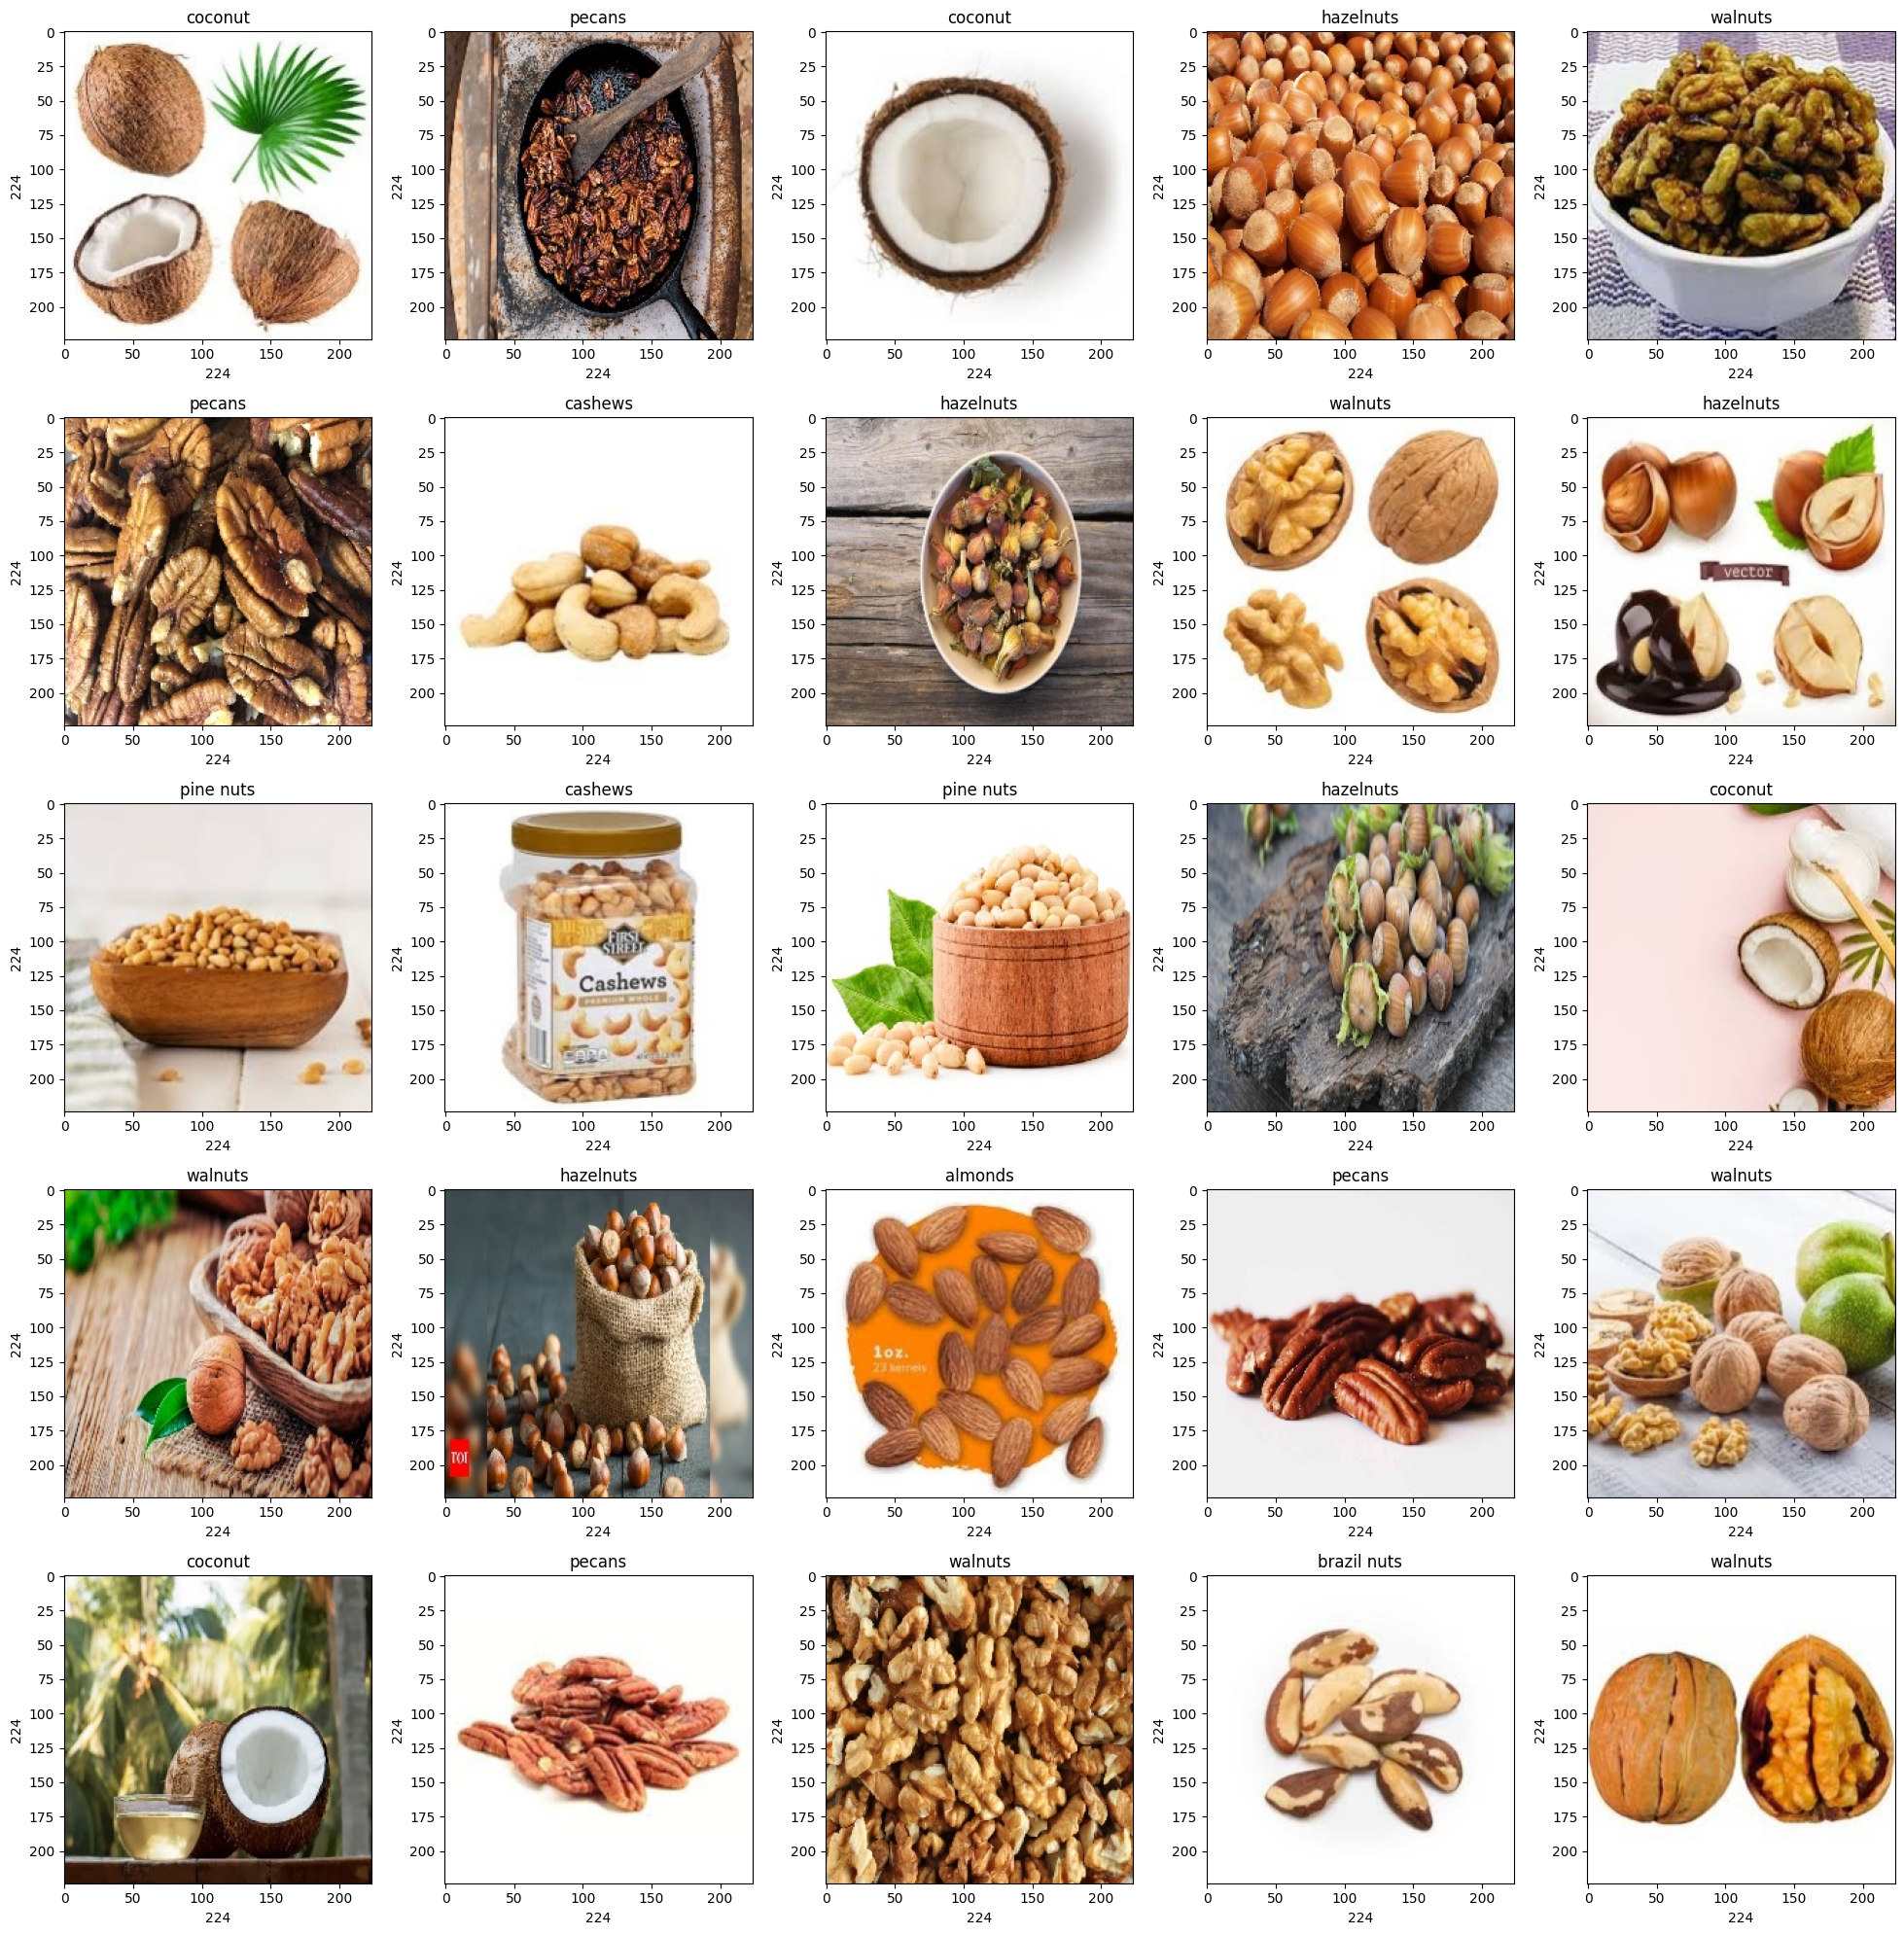

In [34]:
plt.figure(figsize=(20,20))
path = "Nutts/train/"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    selected_folder=random.choice(sorted(listdir(path)))
    rand_img = imread(path +selected_folder+ '/'+random.choice(listdir(path+selected_folder)))
    plt.imshow(rand_img)
    plt.title(str(selected_folder))
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [14]:
training_image_list,training_label_list=[],[]
main_directory="Nutts/train/"
list_main_dir=listdir(main_directory)

for each in list_main_dir:
    imageslist=listdir(main_directory+'/'+each+'/') 
    print(f"Images of {each } directory is loading....")
    for each_images in imageslist:
        i=Image.open(f'{main_directory}/{each}/{each_images}')
        i=i.resize((50 ,50 ))
        image_array_format=img_to_array(i)
        training_image_list.append(image_array_format)
        training_label_list.append(each)

Images of almonds directory is loading....
Images of brazil nuts directory is loading....
Images of cashews directory is loading....
Images of coconut directory is loading....
Images of hazelnuts directory is loading....
Images of macadamia directory is loading....
Images of pecans directory is loading....
Images of pine nuts directory is loading....
Images of pistachios directory is loading....
Images of walnuts directory is loading....


In [15]:
total_Image_category_count=pd.DataFrame(training_label_list).value_counts()
total_Image_category_count

pecans         161
brazil nuts    138
cashews        136
hazelnuts      120
pistachios     110
almonds        109
macadamia      101
pine nuts       98
walnuts         96
coconut         94
Name: count, dtype: int64

In [16]:
lb = LabelBinarizer()
Y_image_train = lb.fit_transform(training_label_list)
print(lb.classes_)
Y_image_train

['almonds' 'brazil nuts' 'cashews' 'coconut' 'hazelnuts' 'macadamia'
 'pecans' 'pine nuts' 'pistachios' 'walnuts']


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [20]:
Test_image_list,Test_label_list=[],[]
main_directory="Nutts/test/"
list_main_dir=listdir(main_directory)

for each in list_main_dir:
    imageslist=listdir(main_directory+'/'+each+'/') 
    print(f"Images of {each } directory is loading....")
    for each_images in imageslist:
        i=Image.open(f'{main_directory}/{each}/{each_images}')
        i = i.resize((50 ,50 ))
        image_array_format=img_to_array(i)
        Test_image_list.append(image_array_format)
        Test_label_list.append(each)

Images of almonds directory is loading....
Images of brazil nuts directory is loading....
Images of cashews directory is loading....
Images of coconut directory is loading....
Images of hazelnuts directory is loading....
Images of macadamia directory is loading....
Images of pecans directory is loading....
Images of pine nuts directory is loading....
Images of pistachios directory is loading....
Images of walnuts directory is loading....


In [21]:
total_Image_category_count=pd.DataFrame(Test_label_list).value_counts()
total_Image_category_count

almonds        5
brazil nuts    5
cashews        5
coconut        5
hazelnuts      5
macadamia      5
pecans         5
pine nuts      5
pistachios     5
walnuts        5
Name: count, dtype: int64

In [22]:
lb = LabelBinarizer()
Y_image_test = lb.fit_transform(Test_label_list)
print(lb.classes_)
Y_image_test[0]

['almonds' 'brazil nuts' 'cashews' 'coconut' 'hazelnuts' 'macadamia'
 'pecans' 'pine nuts' 'pistachios' 'walnuts']


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

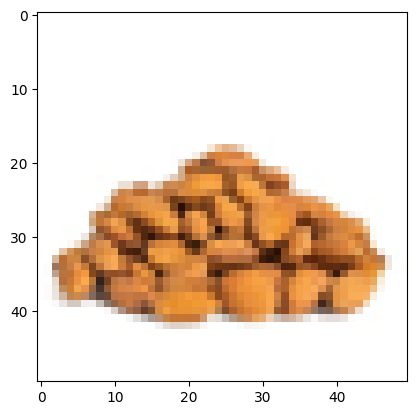

In [23]:
plt.figure()
plt.imshow(array_to_img(Test_image_list[0]))

In [24]:
training_image_list = np.array(training_image_list)/255
Test_image_list = np.array(Test_image_list)/255
training_image_list = training_image_list.reshape( -1,50,50,3)
Test_image_list = Test_image_list.reshape( -1,50,50,3)

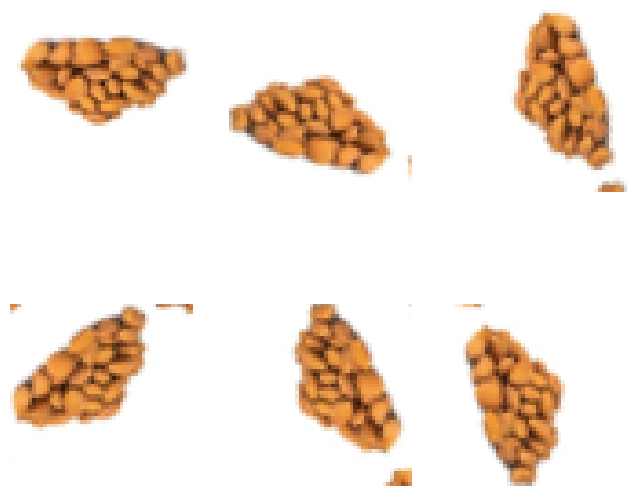

In [25]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])


plt.figure(figsize=(8, 7))
for i in range(6):
  augmented_image = data_augmentation(Test_image_list[0])
  ax = plt.subplot(2, 3, i + 1)
  plt.imshow(augmented_image)
  plt.axis("off")

In [17]:
Test_image_list[1]

array([[[0.60784316, 0.29411766, 0.09411765],
        [0.7647059 , 0.4509804 , 0.2509804 ],
        [0.6862745 , 0.3647059 , 0.1764706 ],
        ...,
        [0.80784315, 0.49411765, 0.25490198],
        [0.90588236, 0.58431375, 0.3254902 ],
        [0.80784315, 0.48235294, 0.20784314]],

       [[0.6       , 0.28627452, 0.09411765],
        [0.67058825, 0.35686275, 0.16470589],
        [0.7921569 , 0.47843137, 0.2901961 ],
        ...,
        [0.7372549 , 0.42352942, 0.18431373],
        [0.85490197, 0.5372549 , 0.28235295],
        [0.81960785, 0.5058824 , 0.23529412]],

       [[0.7254902 , 0.41960785, 0.23137255],
        [0.52156866, 0.21568628, 0.02745098],
        [0.75686276, 0.4509804 , 0.27450982],
        ...,
        [0.7254902 , 0.41960785, 0.1764706 ],
        [0.68235296, 0.36862746, 0.12941177],
        [0.8980392 , 0.58431375, 0.3372549 ]],

       ...,

       [[0.84705883, 0.5411765 , 0.32941177],
        [0.7137255 , 0.40392157, 0.18039216],
        [0.79607844, 0

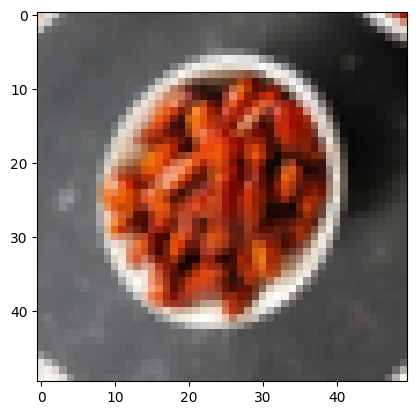

In [26]:
training_image_list_aug=[]
for i in range(len(training_image_list)):
    for j in range(4):
        augmented_image = data_augmentation(training_image_list[i])
        training_image_list_aug.append(augmented_image)
training_image_list_aug = np.array(training_image_list_aug)
plt.figure()
plt.imshow(array_to_img(training_image_list_aug[1]))

In [27]:
Y_image_train.shape

(1163, 10)

In [28]:
Y_image_train_aug=[]
for i in range(len(Y_image_train)):
    for j in range(4):
        Y_image_train_aug.append(Y_image_train[i,:])
Y_image_train_aug = np.array(Y_image_train_aug)
Y_image_train_aug.shape

(4652, 10)

In [29]:
training_image_list_aug.shape

(4652, 50, 50, 3)

In [50]:
model2 = Sequential()
model2.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(50,50,3)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(32, activation='sigmoid'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 conv2d_28 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 23, 23, 64)        0         
                                                                 
 flatten_10 (Flatten)        (None, 33856)             0         
                                                                 
 dense_26 (Dense)            (None, 64)                2166848   
                                                     

In [51]:
from keras.optimizers import Adam
from keras.optimizers import SGD
opt2 = Adam(learning_rate=0.001)
model2.compile(optimizer=opt2,loss = 'categorical_crossentropy', metrics=['accuracy'])

In [52]:
history2 = model2.fit(training_image_list_aug, Y_image_train_aug, batch_size = 256, epochs = 500)

Epoch 1/500
19/19 [==============================] - 5s 255ms/step - loss: 2.3359 - accuracy: 0.1204
Epoch 2/500
19/19 [==============================] - 5s 260ms/step - loss: 2.2626 - accuracy: 0.1346
Epoch 3/500
19/19 [==============================] - 5s 255ms/step - loss: 2.2428 - accuracy: 0.1589
Epoch 4/500
19/19 [==============================] - 5s 256ms/step - loss: 2.2138 - accuracy: 0.1795
Epoch 5/500
19/19 [==============================] - 5s 255ms/step - loss: 2.1863 - accuracy: 0.1928
Epoch 6/500
19/19 [==============================] - 5s 256ms/step - loss: 2.1365 - accuracy: 0.2081
Epoch 7/500
19/19 [==============================] - 5s 250ms/step - loss: 2.1161 - accuracy: 0.2221
Epoch 8/500
19/19 [==============================] - 5s 256ms/step - loss: 2.0752 - accuracy: 0.2403
Epoch 9/500
19/19 [==============================] - 5s 252ms/step - loss: 2.0392 - accuracy: 0.2616
Epoch 10/500
19/19 [==============================] - 5s 253ms/step - loss: 2.0093 - accura

In [54]:
Y_img_pred=model2.predict(Test_image_list)

2/2 [==============================] - 0s 15ms/step


In [65]:
test_loss, test_acc = model2.evaluate(Test_image_list, Y_image_test,verbose=1)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)
print('Accuracy: %.2f' % (test_acc*100))


2/2 [==============================] - 0s 12ms/step - loss: 7.0895 - accuracy: 0.2200
Test Accuracy:  0.2199999988079071 
Test Loss:  7.089460372924805
Accuracy: 22.00


## RNN

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
Text_data= pd.read_csv('Emotion_classify_Data.csv')
X_text_train = Text_data.iloc[:, :-1]
Y_text_train = Text_data.iloc[:, -1]

In [97]:
X_text_train

Comment
0     i seriously hate one subject to death but now ...
1                    im so full of life i feel appalled
2     i sit here to write i start to dig out my feel...
3     ive been really angry with r and i feel like a...
4     i feel suspicious if there is no one outside l...
...                                                 ...
5932                 i begun to feel distressed for you
5933  i left feeling annoyed and angry thinking that...
5934  i were to ever get married i d have everything...
5935  i feel reluctant in applying there because i w...
5936  i just wanted to apologize to you because i fe...

[5937 rows x 1 columns]

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Text_data['EmotionEnc'] = le.fit_transform(Text_data['Emotion'])

In [100]:
Text_data.head()

Comment Emotion  EmotionEnc
0  i seriously hate one subject to death but now ...    fear           1
1                 im so full of life i feel appalled   anger           0
2  i sit here to write i start to dig out my feel...    fear           1
3  ive been really angry with r and i feel like a...     joy           2
4  i feel suspicious if there is no one outside l...    fear           1

In [101]:
X = Text_data['Comment']
y = Text_data['EmotionEnc']

In [102]:
from sklearn.model_selection import train_test_split
X_text_train, X_text_test, Y_text_train, Y_text_test = train_test_split(X, y, test_size=0.20)

In [104]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_text_train)
X_train_seq = tokenizer.texts_to_sequences(X_text_train)
X_test_seq = tokenizer.texts_to_sequences(X_text_test)

In [105]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Padding 
max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [107]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
model3 = keras.Sequential()
model3.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model3.add(LSTM(100))
model3.add(Dense(3, activation='sigmoid'))
model3.add(Dense(3, activation='softmax'))  # 3 output classes

In [108]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 128)          128000    
                                                                 
 lstm_4 (LSTM)               (None, 100)               91600     
                                                                 
 dense_10 (Dense)            (None, 3)                 303       
                                                                 
 dense_11 (Dense)            (None, 3)                 12        
                                                                 
Total params: 219915 (859.04 KB)
Trainable params: 219915 (859.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [119]:
epochs = 20
batch_size = 64
history = model3.fit(X_train_pad, Y_text_train, epochs=epochs, batch_size=batch_size)

Epoch 1/20
75/75 [==============================] - 14s 170ms/step - loss: 0.1167 - accuracy: 0.9880
Epoch 2/20
75/75 [==============================] - 10s 127ms/step - loss: 0.1027 - accuracy: 0.9901
Epoch 3/20
75/75 [==============================] - 7s 88ms/step - loss: 0.1007 - accuracy: 0.9891
Epoch 4/20
75/75 [==============================] - 6s 86ms/step - loss: 0.0827 - accuracy: 0.9924
Epoch 5/20
75/75 [==============================] - 11s 152ms/step - loss: 0.0747 - accuracy: 0.9933
Epoch 6/20
75/75 [==============================] - 11s 153ms/step - loss: 0.0716 - accuracy: 0.9922
Epoch 7/20
75/75 [==============================] - 10s 138ms/step - loss: 0.0773 - accuracy: 0.9895
Epoch 8/20
75/75 [==============================] - 7s 88ms/step - loss: 0.1040 - accuracy: 0.9783
Epoch 9/20
75/75 [==============================] - 7s 87ms/step - loss: 0.0739 - accuracy: 0.9861
Epoch 10/20
75/75 [==============================] - 10s 136ms/step - loss: 0.0601 - accuracy: 0.99

In [120]:
loss, accuracy = model3.evaluate(X_test_pad, Y_text_test)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

38/38 [==============================] - 2s 36ms/step - loss: 0.3061 - accuracy: 0.9200
Loss: 0.3061
Accuracy: 0.9200
